In [33]:

import folium
import numpy as np
import time
from IPython.display import display, HTML

# Function to calculate distance between two points using Haversine formula
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).miles

# Function to simulate truck movement and generate random coordinates
def simulate_truck_movement(num_points=48, num_trucks=10):
    # Generate time points for a day (48 intervals of 30 minutes)
    time_points = np.linspace(0, 24, num_points)

    # Generate random starting coordinates for each truck
    truck_coordinates = {f'Truck_{i+1}': {'latitude': np.random.uniform(35, 40),
                                           'longitude': np.random.uniform(-120, -100),
                                           'speed': np.random.uniform(5, 20),
                                           'color': f'#{np.random.randint(0, 0xFFFFFF):06x}',
                                           'total_distance': 0}
                         for i in range(num_trucks)}
    
    # Simulate movement for each truck
    movement_data = {'type': 'FeatureCollection', 'features': []}
    for t in time_points:
        for truck, coords in truck_coordinates.items():
            # Simulate movement based on speed and time
            new_latitude = coords['latitude'] + (np.random.normal(0, 0.0005) * coords['speed'])
            new_longitude = coords['longitude'] + (np.random.normal(0, 0.0005) * coords['speed'])

            # Calculate distance and update total_distance
            distance = calculate_distance((coords['latitude'], coords['longitude']), (new_latitude, new_longitude))
            coords['total_distance'] += distance

            # Update coordinates
            coords['latitude'] = new_latitude
            coords['longitude'] = new_longitude

            # Add coordinates to GeoJSON data at 15-minute intervals
            if t % 0.25 == 0:
                feature = {
                    'type': 'Feature',
                    'geometry': {
                        'type': 'Point',
                        'coordinates': [coords['longitude'], coords['latitude']],
                    },
                    'properties': {
                        'time': str(t),
                        'icon': 'circle',
                        'iconstyle': {
                            'fillColor': coords['color'],
                            'fillOpacity': 0.6,
                            'color': 'transparent',  # Set the border color to transparent
                            'radius': 5,
                        },
                    },
                }
                movement_data['features'].append(feature)

    return movement_data, truck_coordinates

# Function to display the map in a Jupyter Notebook
def display_map(m):
    display(m._repr_html_())

# Plotting function for updating map at larger time intervals
def plot_incremental_truck_movement(truck_movement_data):
    m = folium.Map(location=[36, -110], zoom_start=5)  # Centered around the United States

    for i, point in enumerate(truck_movement_data['features']):
        # Add data points incrementally
        folium.Marker(location=[point['geometry']['coordinates'][1], point['geometry']['coordinates'][0]],
                      icon=folium.Icon(color='blue' if i % 5 == 0 else 'red'),
                      popup=f"Truck {i % 5 + 1} - Time: {point['properties']['time']}").add_to(m)

        # Display the map in the Jupyter Notebook
        display_map(m)
        
        # Pause for one second before updating the map
        time.sleep(1)

    return m

# Simulate truck movement
truck_movement_data, truck_coordinates = simulate_truck_movement()

# Plot the incremental animated results on a map
plot_incremental_truck_movement(truck_movement_data)


'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

'<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe srcdoc="&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;\n    \n    &lt;meta http-equiv=&quot;content-type&quot; content=&quot;text/html; charset=UTF-8&quot; /&gt;\n    \n        &lt;script&gt;\n            L_NO_TOUCH = false;\n            L_DISABLE_3D = false;\n        &lt;/script&gt;\n    \n    &lt;style&gt;html, body {width: 100%;height: 100%;margin: 0;padding: 0;}&lt;/style&gt;\n    &lt;style&gt;#map {position:absolute;top:0;bottom:0;right:0;left:0;}&lt;/style&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://code.jquery.com/jquery-3.7.1.min.js&quot;&gt;&lt;/script&gt;\n    &lt;script src=&quot;https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js&quot;&gt;&lt;/sc

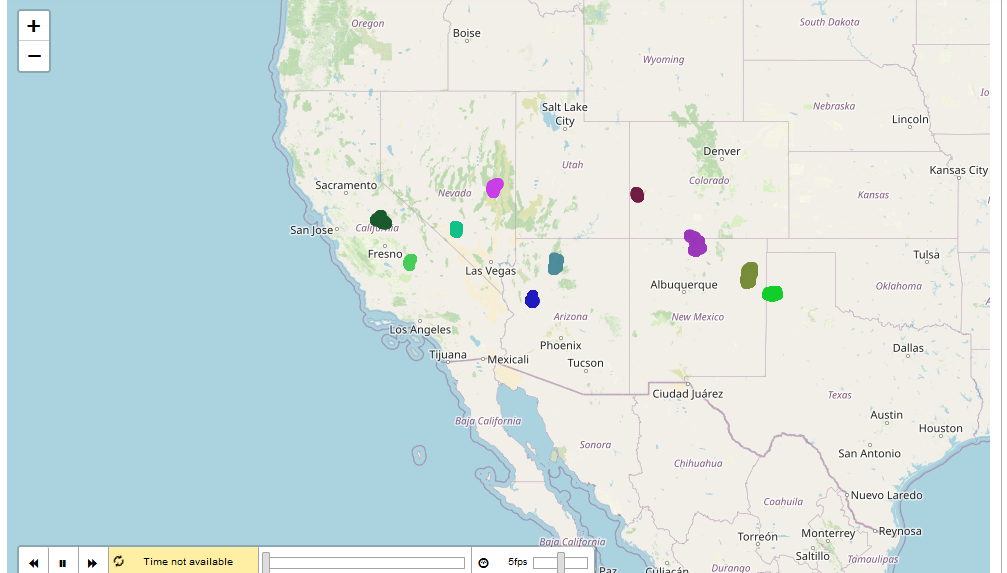

In [27]:

# Zoomed out view of all 10 trucks routes.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


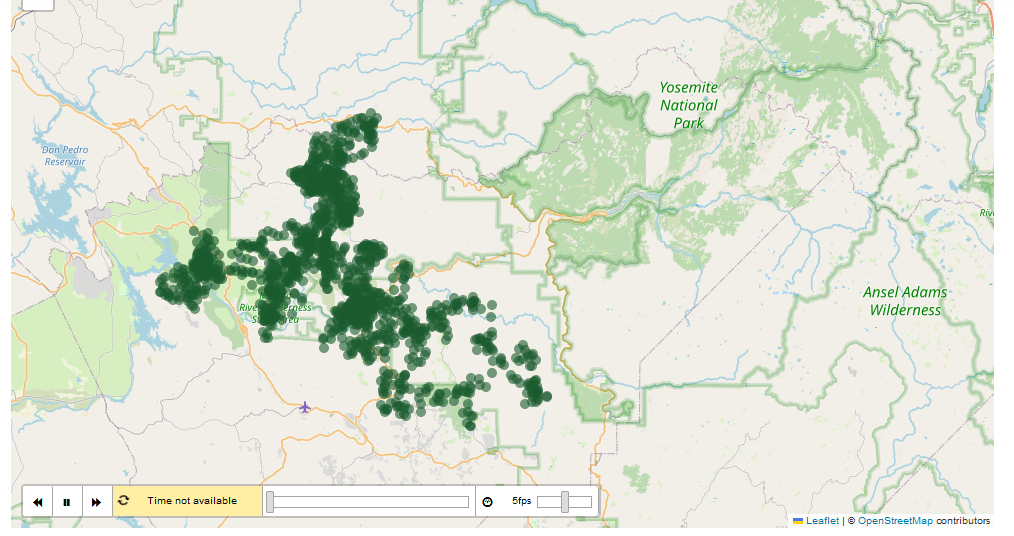

In [28]:

# Here is a zoomed version of what we saw above.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")


In [23]:

# Here is a similar exercise, but instead of plotting the routes, we are calculating the total distance that cach truck
# drove in a 24 hour period.

import folium
from folium.plugins import TimestampedGeoJson
import numpy as np
from geopy.distance import geodesic

# Function to calculate distance between two points using Haversine formula
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).miles

# Function to simulate truck movement and generate random coordinates
def simulate_truck_movement(num_points=1440, num_trucks=10):
    # Generate time points for a day (1440 minutes)
    time_points = np.linspace(0, 24, num_points)

    # Generate random starting coordinates for each truck
    truck_coordinates = {f'Truck_{i+1}': {'latitude': np.random.uniform(35, 40),
                                           'longitude': np.random.uniform(-120, -100),
                                           'speed': np.random.uniform(5, 20),
                                           'color': f'#{np.random.randint(0, 0xFFFFFF):06x}',
                                           'total_distance': 0}
                         for i in range(num_trucks)}
    
    # Simulate movement for each truck
    movement_data = {'type': 'FeatureCollection', 'features': []}
    for t in time_points:
        for truck, coords in truck_coordinates.items():
            # Simulate movement based on speed and time
            new_latitude = coords['latitude'] + (np.random.normal(0, 0.0005) * coords['speed'])
            new_longitude = coords['longitude'] + (np.random.normal(0, 0.0005) * coords['speed'])

            # Calculate distance and update total_distance
            distance = calculate_distance((coords['latitude'], coords['longitude']), (new_latitude, new_longitude))
            coords['total_distance'] += distance

            # Update coordinates
            coords['latitude'] = new_latitude
            coords['longitude'] = new_longitude

            # Add coordinates to GeoJSON data
            feature = {
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [coords['longitude'], coords['latitude']],
                },
                'properties': {
                    'time': str(t),
                    'icon': 'circle',
                    'iconstyle': {
                        'fillColor': coords['color'],
                        'fillOpacity': 0.6,
                        'color': 'transparent',  # Set the border color to transparent
                        'radius': 5,
                    },
                },
            }
            movement_data['features'].append(feature)

    return movement_data, truck_coordinates

# Plotting function
def plot_truck_movement(truck_movement_data):
    m = folium.Map(location=[36, -110], zoom_start=5)  # Centered around the United States

    TimestampedGeoJson(truck_movement_data, period='PT1M', duration='PT1M', add_last_point=True).add_to(m)

    m.save('truck_movement_map.html')
    return m

# Simulate truck movement
truck_movement_data, truck_coordinates = simulate_truck_movement()

# Plot the results on a map
plot_truck_movement(truck_movement_data)

# Calculate total distance for each truck
for truck, coords in truck_coordinates.items():
    print(f"{truck} Total Distance: {coords['total_distance']:.2f} miles")
    

Truck_1 Total Distance: 378.46 miles
Truck_2 Total Distance: 1123.21 miles
Truck_3 Total Distance: 384.28 miles
Truck_4 Total Distance: 306.15 miles
Truck_5 Total Distance: 503.37 miles
Truck_6 Total Distance: 1011.28 miles
Truck_7 Total Distance: 514.36 miles
Truck_8 Total Distance: 569.07 miles
Truck_9 Total Distance: 1021.28 miles
Truck_10 Total Distance: 933.29 miles


In [36]:

import folium
import numpy as np
from folium.plugins import TimestampedGeoJson
from IPython.display import HTML, display

# Function to simulate truck movement and generate random coordinates
def simulate_truck_movement(num_points=48, num_trucks=10):
    # Generate time points for a day (48 intervals of 30 minutes)
    time_points = np.linspace(0, 24, num_points)

    # Generate random starting coordinates for each truck
    truck_coordinates = {f'Truck_{i+1}': {'latitude': np.random.uniform(35, 40),
                                           'longitude': np.random.uniform(-120, -100),
                                           'speed': np.random.uniform(5, 20),
                                           'color': f'#{np.random.randint(0, 0xFFFFFF):06x}',
                                           'total_distance': 0}
                         for i in range(num_trucks)}
    
    # Simulate movement for each truck
    movement_data = {'type': 'FeatureCollection', 'features': []}
    for t in time_points:
        for truck, coords in truck_coordinates.items():
            # Simulate movement based on speed and time
            new_latitude = coords['latitude'] + (np.random.normal(0, 0.0005) * coords['speed'])
            new_longitude = coords['longitude'] + (np.random.normal(0, 0.0005) * coords['speed'])

            # Calculate distance and update total_distance
            distance = geodesic((coords['latitude'], coords['longitude']), (new_latitude, new_longitude)).miles
            coords['total_distance'] += distance

            # Update coordinates
            coords['latitude'] = new_latitude
            coords['longitude'] = new_longitude

            # Add coordinates to GeoJSON data at 15-minute intervals
            if t % 0.25 == 0:
                feature = {
                    'type': 'Feature',
                    'geometry': {
                        'type': 'Point',
                        'coordinates': [coords['longitude'], coords['latitude']],
                    },
                    'properties': {
                        'time': str(t),
                        'icon': 'circle',
                        'iconstyle': {
                            'fillColor': coords['color'],
                            'fillOpacity': 0.6,
                            'color': 'transparent',  # Set the border color to transparent
                            'radius': 5,
                        },
                    },
                }
                movement_data['features'].append(feature)

    return movement_data

# Create an animated map using TimestampedGeoJson
def create_animated_map(truck_movement_data):
    m = folium.Map(location=[36, -110], zoom_start=5)  # Centered around the United States

    # Create TimestampedGeoJson layer
    timestamped_geojson = TimestampedGeoJson(truck_movement_data, period='PT15M', duration='PT15M', add_last_point=True)
    timestamped_geojson.add_to(m)

    return m

# Simulate truck movement
truck_movement_data = simulate_truck_movement()

# Create and display the animated map
animated_map = create_animated_map(truck_movement_data)
display(animated_map)


In [ ]:

# GPS fleet vehicle tracking helps companies keep tabs on their vehicles and drivers to maximize how these assets 
# operate, and reach their customers and clients efficiently. It also helps reduce fuel waste, improve 
# maintenance practices, and overall makes customer service more positive. Win, win, win!!!
